In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.preprocessing import StandardScaler
import keras.optimizers
import tensorflow as tf
import matplotlib.pyplot as plt


In [37]:
data_train_pre = pd.read_csv("datasets/logisticRegression_feature_data/train_pre.csv")

In [38]:
y_train_pre = data_train_pre['TeamVictory']
X_train_pre = data_train_pre.drop('TeamVictory', axis=1)

In [39]:
scaler = StandardScaler()
X_scale = X_train_pre.copy()
scaler.fit(X_scale)
X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )

In [40]:
train_pre_X, test_pre_X, train_pre_y, test_pre_y = train_test_split(X_scale, y_train_pre, test_size = 0.2, random_state = 0)

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,Team1_Top_attackScore,Team1_Jug_attackScore,Team1_Mid_attackScore,Team1_Bot_attackScore,Team1_Uti_attackScore,...,Team1_Top_controlScore,Team1_Jug_controlScore,Team1_Mid_controlScore,Team1_Bot_controlScore,Team1_Uti_controlScore,Team2_Top_controlScore,Team2_Jug_controlScore,Team2_Mid_controlScore,Team2_Bot_controlScore,Team2_Uti_controlScore
1525,-0.302729,0.530685,0.173728,-0.726400,-1.705119,-0.208317,0.263919,0.174820,1.026434,0.161020,...,-0.082055,0.221226,-0.560212,-0.849214,-0.851014,0.582466,-0.258430,-1.299079,-0.457158,-1.344014
1837,0.023418,0.788775,0.173728,1.138878,1.590395,0.059302,0.540024,-1.825171,0.162256,1.775953,...,-1.226611,-0.886329,1.564375,0.380781,-0.246186,1.811398,-0.093473,-0.336892,-0.993911,-0.477678
6917,-0.847574,0.187975,-0.554878,0.068896,0.108098,0.257563,-0.493255,-0.446572,-0.192890,-1.102268,...,-0.034664,-0.608673,1.555409,-0.458213,1.334496,-0.340985,1.269395,0.475254,-0.888057,0.285049
3172,-0.863480,2.729249,-0.876378,-0.144168,-0.480671,0.819139,-1.222818,0.908814,-1.258955,-0.414668,...,-0.516515,1.248754,0.961371,1.234572,-1.760104,-1.006710,-0.200027,0.114465,-0.888057,1.301501
7974,0.023418,1.111492,0.173728,1.184802,0.412475,0.379595,-0.002532,0.074517,1.899239,0.932554,...,-1.007588,-0.035656,0.886898,-0.282304,-0.515878,0.750130,-1.031222,-1.609279,-0.993911,-1.344014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-1.446003,0.916581,-0.979286,-0.493682,-1.030579,-0.070909,-0.595905,-0.853846,-2.364393,1.775953,...,1.021514,-0.262009,-0.273530,1.651055,-0.246186,-1.497245,-0.258430,0.172458,0.259160,-0.535813
4859,1.303363,-0.354226,0.173728,-0.642439,-0.665853,0.234662,-0.595905,-2.477226,-2.364393,-0.414668,...,-0.521638,-0.262009,1.220157,1.651055,-1.760104,0.087260,0.363136,1.944323,-0.457158,0.471597
3264,0.023418,-0.552668,0.173728,-0.726400,0.015239,-0.531718,-0.228329,-0.337781,1.026434,-0.731532,...,1.404997,-0.642815,-0.139031,-0.849214,2.120087,0.087260,0.510700,-1.254906,-0.457158,-1.344014
9845,-0.416061,0.187975,0.173728,1.184802,0.694579,0.559535,0.944697,1.399067,1.899239,-0.504856,...,-1.650824,1.115796,0.500587,-0.282304,0.513016,-0.068466,-0.200027,0.306458,-0.993911,2.045108


In [33]:
# model = LogisticRegression()
# model.fit(train_pre_X, train_pre_y)
# y_predict = model.predict(test_pre_X)
# accuracy_score(test_pre_y, y_predict)


0.6137055837563452

Epoch 1/500
247/247 [==============================] - 1s 964us/step - loss: 2.6249e-04 - accuracy: 0.9991
Epoch 2/500
247/247 [==============================] - 0s 924us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/500
247/247 [==============================] - 0s 912us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/500
247/247 [==============================] - 0s 903us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/500
247/247 [==============================] - 0s 948us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/500
247/247 [==============================] - 0s 940us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/500
247/247 [==============================] - 0s 948us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/500
247/247 [==============================] - 0s 936us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/500
247/247 [==============================] - 0s 952us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/500
247/247 [===============

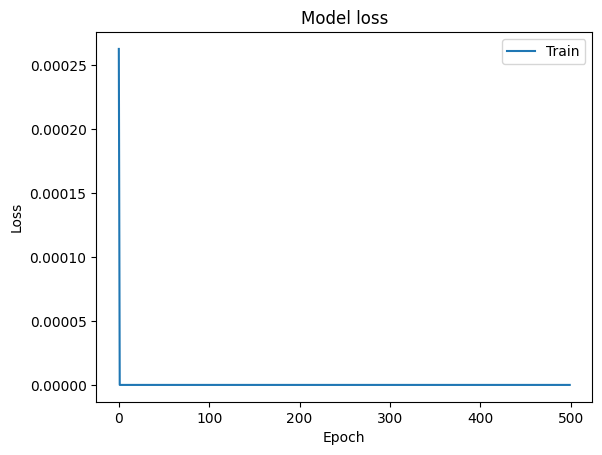

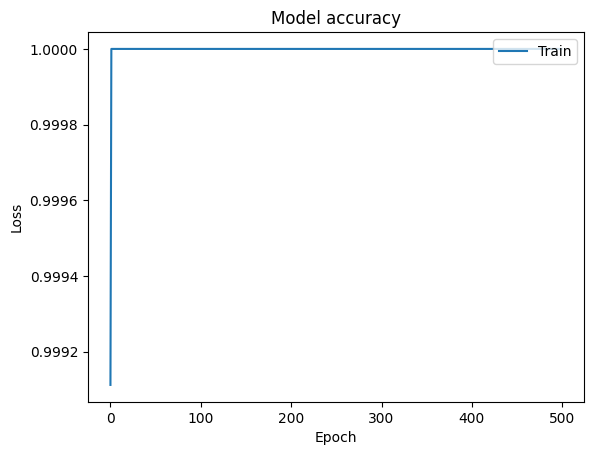

In [42]:
train_pre_X = tf.cast(train_pre_X, tf.float32)
neuralModle = tf.keras.models.Sequential()

neuralModle.add(tf.keras.layers.Dense(units=47, activation='relu'))
neuralModle.add(tf.keras.layers.Dense(units=30, activation='relu'))
neuralModle.add(tf.keras.layers.Dense(units=20, activation='relu'))
neuralModle.add(tf.keras.layers.Dense(units=15, activation='relu'))
neuralModle.add(tf.keras.layers.Dense(units=6, activation='relu'))
neuralModle.add(tf.keras.layers.Dense(units=2, activation='relu'))

y_ = tf.one_hot(train_pre_y, depth=2)

neuralModle.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #default lr

hist = neuralModle.fit(train_pre_X, y_, batch_size = 32, epochs = 500)


plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


